In [2]:
import pandas as pd
import numpy as np
import datetime
from math import floor
import matplotlib.pyplot as plt

In [3]:
database = pd.read_excel(r"C:\Users\Iago Vale\Desktop\database_final.xlsx", sheet_name= 'Planilha1')

In [4]:
database.columns

Index(['Column1', 'DT_NOTIFIC', 'ID_MUNICIP', 'ID_UNIDADE', 'ID_REGIONA',
       'ID_RG_RESI', 'DT_OCOR', 'DT_NASC', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'DEF_TRANS', 'DEF_FISICA', 'DEF_MENTAL', 'DEF_VISUAL',
       'DEF_AUDITI', 'TRAN_MENT', 'TRAN_COMP', 'LOCAL_OCOR', 'OUT_VEZES',
       'LES_AUTOP', 'VIOL_FISIC', 'VIOL_PSICO', 'VIOL_TORT', 'VIOL_SEXU',
       'VIOL_TRAF', 'VIOL_FINAN', 'VIOL_INFAN', 'AG_ENFOR', 'AG_OBJETO',
       'AG_CORTE', 'AG_ENVEN', 'AG_FOGO', 'AG_AMEACA', 'AG_OUTROS',
       'SEX_ASSEDI', 'SEX_ESTUPR', 'REL_PAI', 'REL_MAE', 'REL_PAD', 'REL_CONJ',
       'REL_EXCON', 'REL_NAMO', 'REL_EXNAM', 'REL_FILHO', 'REL_DESCO',
       'REL_IRMAO', 'REL_CONHEC', 'AUTOR_SEXO', 'ORIENT_SEX', 'IDENT_GEN',
       'DT_ENCERRA'],
      dtype='object')

O suicídio é um tema complexo e sensível que tem sido objeto de muitos estudos em diversas áreas, incluindo a psicologia, a sociologia e a saúde pública. O objetivo deste trabalho é analisar dados e referências sobre o tema, a fim de entender melhor o problema do suicídio e suas principais causas e fatores de risco.

Para isso, serão utilizados dados de organizações internacionais, como a Organização Mundial da Saúde (OMS), que coletam e analisam informações sobre o suicídio em todo o mundo. Além disso, serão utilizados estudos e artigos científicos que abordam diferentes aspectos do suicídio, como os fatores de risco associados, as intervenções preventivas eficazes e as consequências para a saúde mental.

Ao longo deste trabalho, serão discutidos temas importantes relacionados ao suicídio, como a importância da conscientização e do acesso a serviços de saúde mental, a relação entre o suicídio e a saúde pública e as estratégias eficazes para prevenção do suicídio. Espera-se que a análise desses dados e referências possa fornecer uma compreensão mais completa sobre o suicídio e suas implicações para a sociedade e para a saúde pública.

Descrição do banco

O banco é oriundo do Departamento de Informática do Sistema Único de Saúde do Brasil (DATASUS). Ele é responsável por coletar, processar e disseminar informações e estatísticas sobre a saúde pública do país. Com isso, a base foi filtrada para os meses de Janeiro, Fevereiro e Março do ano de 2021 considerando todos os estados do Brasil, devido a extensão do arquivo e da complexidade computacional que foi gerada.  

### Análises

Ocorrências ao longo dos meses

(array([8220.,    0., 8276.,    0., 7934.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

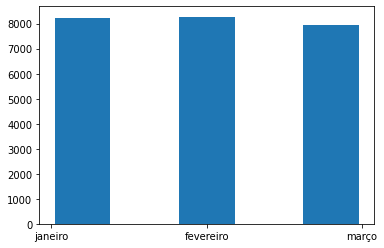

In [5]:
#tratamento dos dados para fazer a ocorrencia deles. ou seja, catetgorizar os dias em meses
database['mes'] = database['DT_NOTIFIC'].dt.month
database['contagem_meses'] = database.groupby('mes')['DT_NOTIFIC'].count()
database['mes'].replace({1: "janeiro", 2: "fevereiro", 3: "março"}, inplace = True)
plt.hist(database['mes'], 5, rwidth = 0.9)

Aqui conseguimos observar a frequência de ocorrências de sucídios registrados no país e conseguimos obsevar que os valores são bem próximos ao longo dos meses de janeiro, fevereiro e março de 2021.

Raças

In [6]:
#categorizar as raças
database['CS_RACA'].replace({1: 'Branca', 2: 'Preta', 3: 'Amarela', 4:'Parda', 5:'Indigena', 9: 'Ignorado'}, inplace= True)

Text(0, 0.5, 'Número de Suicídios')

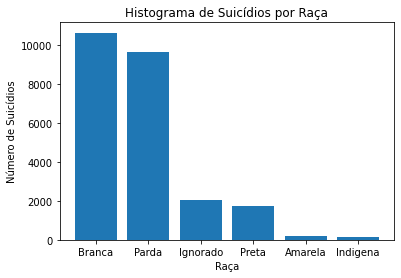

In [8]:
counts = database['CS_RACA'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Histograma de Suicídios por Raça')
plt.xlabel('Raça')
plt.ylabel('Número de Suicídios')

In [9]:
database['CS_RACA'].value_counts()

Branca      10621
Parda        9643
Ignorado     2038
Preta        1737
Amarela       182
Indigena      152
Name: CS_RACA, dtype: int64

De acordo com o gráfico acima, conseguimos entender observar que a quantidade de pessoas que mais comum entre pessoas declaradas brancas e pardas. Com valores absolutos de 10621 casos para brancos e 9643 para pardos. Enquanto os auto declarados indígenas e pardas tiveram 182 e 152 casos registrados, respectivamente.

Idade

A Organização Mundial da Saúde (OMS) estabelece uma classificação das faixas etárias baseada nas idades, visando orientar profissionais de saúde e demais interessados no assunto. De acordo com a OMS, a categoria Criança é composta por indivíduos de 0 a 9 anos de idade. Já a categoria Adolescente engloba aqueles que têm entre 10 e 19 anos. A categoria Adulto Jovem se estende dos 20 aos 24 anos de idade. A categoria Adulto é formada por pessoas de 25 a 64 anos, enquanto a categoria Idoso abrange os indivíduos com mais de 65 anos de idade. É importante lembrar que essa classificação é apenas uma referência e que cada pessoa pode ter um desenvolvimento diferente em relação à idade.

In [20]:
def calcular_idade(data_nascimento):
    hoje = datetime.date.today()
    idade = hoje.year - data_nascimento.year - ((hoje.month, hoje.day) < (data_nascimento.month, data_nascimento.day))
    return idade

database['IDADE'] = database['DT_NASC'].apply(calcular_idade)
database['IDADE']

def categorizar_idade(idade):
    if idade < 10:
        return 'Criança'
    elif idade < 20:
        return 'Adolescente'
    elif idade < 25:
        return 'Adulto Jovem'
    elif idade < 65:
        return 'Adulto'
    else:
        return 'Idoso'

database['faixa_etaria'] = database['IDADE'].apply(categorizar_idade)

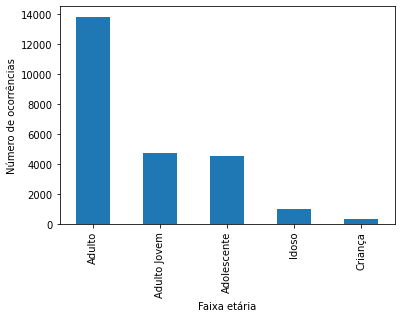

In [21]:
counts = database['faixa_etaria'].value_counts()
counts.plot.bar()
plt.xlabel('Faixa etária')
plt.ylabel('Número de ocorrências')
plt.show()

De acordo com o gráfico acima, é possível observar que a taxa de suicídio é consideravelmente maior que em relação às demais idades, uma maneira de visualizar isso, é repartindo ainda mais essa divisão.

In [22]:
def categorizar_idade1(idade):
    if idade < 10:
        return '0-9 anos'
    elif idade < 20:
        return '0-19 anos'
    elif idade < 30:
        return '20-29 anos'
    elif idade < 40:
        return '30-39 anos'
    elif idade < 50:
        return '40-49 anos'
    elif idade < 60:
        return '50-59 anos'
    else:
        return 'Idoso'

database['faixa_etaria'] = database['IDADE'].apply(categorizar_idade1)

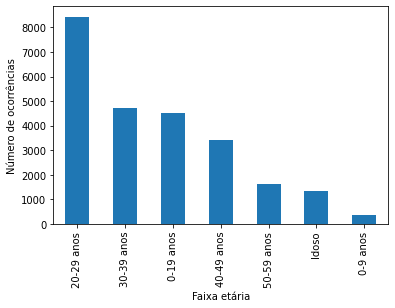

In [23]:
counts = database['faixa_etaria'].value_counts()
counts.plot.bar()
plt.xlabel('Faixa etária')
plt.ylabel('Número de ocorrências')
plt.show()

Agora abrindo um pouco mais essas divisórias, é possível observar que os maior número de casos de suicídio no Brasil se concentra em pessoas de 20-29 anos de idade.

Sexo

In [25]:
database['CS_SEXO'].replace({'F' : 'Feminino', 'M': 'Masculino'}, inplace= True)

Text(0, 0.5, 'Número de Suicídios')

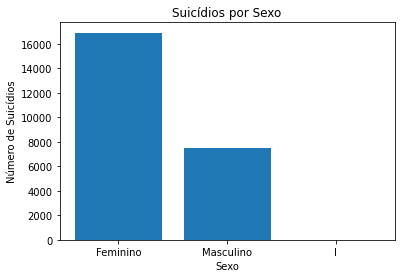

In [29]:
counts_sexo = database['CS_SEXO'].value_counts()
plt.bar(counts_sexo.index, counts_sexo.values)
plt.title('Suicídios por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Suicídios')

Com isso, considerando o gráfico acima, vemos que o número de indivíduos do sexo feminino cometeu suicídio com uma taxa de 2.3 vezes maior em comparação ao sexo masculino. Enquanto temos apenas 6 casos pessoas com sexo indeterminado.

Referências
https://bvsms.saude.gov.br/bvs/publicacoes/07_0400_M.pdf



https://datasus.saude.gov.br/transferencia-de-arquivos/#



file:///C:/Users/Iago%20Vale/Desktop/DIC_DADOS_NET_Violencias_v5.pdf
